In [55]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import math 
import pandas as pd
plt.style.use('ggplot')



In [56]:
def set_ax_style(ax):
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

    #for line in ax.get_ygridlines()+ax.get_xgridlines():
    #    line.set_linestyle('-.')
    #    line.set_color("black")
    #    line.set_linewidth(1.0)

    for line in ax.get_xticklines() + ax.get_yticklines():
        line.set_linewidth(1.0)


    ticklabels = ax.get_xticklabels() + ax.get_yticklabels()   
    for label in ticklabels:
        label.set_fontsize(15)

# Resultados para um nó

In [57]:
names = ["Caso", "Tipo", "Processos/Threads" ,"Tempo Total", "Tempo Encontrar Minimo", "Tempo Sincronizar", "Iteracoes", "Custo Calc", "Custo Otimo"]
data = pd.read_csv("resultados_random_1.txt", sep=";", header=None, names=names)
data["Tempo Swap"] = data["Tempo Total"] - data["Tempo Encontrar Minimo"] - data["Tempo Sincronizar"]
names.append("Tempo Swap")


In [58]:
data.Caso = data.Caso.apply(lambda x: x.split("/")[-1].split(".")[0])
data.Tipo = data.Tipo.apply(lambda x: x.strip())

casos = data.Caso.unique()

In [59]:
mean_data = data.groupby(names[0:3], as_index=False).mean()
mean_data


,Caso,Tipo,Processos/Threads,Tempo Total,Tempo Encontrar Minimo,Tempo Sincronizar,Iteracoes,Custo Calc,Custo Otimo,Tempo Swap
0,att48,MPI,1,3.309209e+00,3.145115e+00,0.060027,44.130435,35138.836804,33523.708507,0.104067
1,att48,MPI,2,2.216436e+00,1.634713e+00,0.469249,44.434783,35170.669271,33523.708507,0.112474
2,att48,MPI,4,1.591680e+00,8.512228e-01,0.629978,43.739130,35138.830815,33523.708507,0.110479
3,att48,MPI,8,1.548872e+00,4.485751e-01,0.963712,44.181818,35175.912508,33523.708507,0.136585
4,att48,MPI,16,1.731024e+00,3.568781e-01,1.209140,43.863636,35040.620748,33523.708507,0.165006
5,att48,OpenMP,1,3.597266e+00,3.448596e+00,0.040833,43.550000,34770.831854,33523.708507,0.107837
6,att48,OpenMP,2,2.197083e+00,1.951392e+00,0.067932,44.350000,34826.481586,33523.708507,0.177759
7,att48,OpenMP,4,1.663342e+00,1.097803e+00,0.068189,44.250000,34876.415360,33523.708507,0.497351
8,att48,OpenMP,8,2.308496e+00,6.497437e-01,0.197815,43.500000,35029.511349,33523.708507,1.460937
9,att48,OpenMP,16,1.329773e+01,3.047669e-01,1.281238,44.150000,35106.051201,15923.761541,11.711725


In [60]:
results={}

for caso in mean_data["Caso"].unique():
    results[caso] = pd.DataFrame(mean_data[mean_data.Caso == caso])

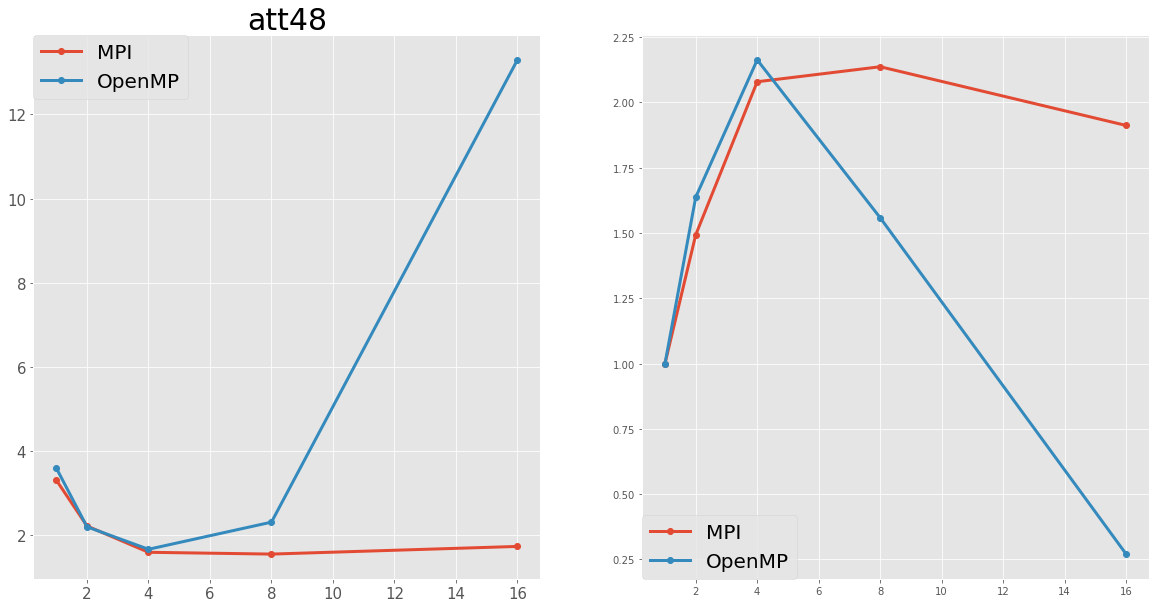

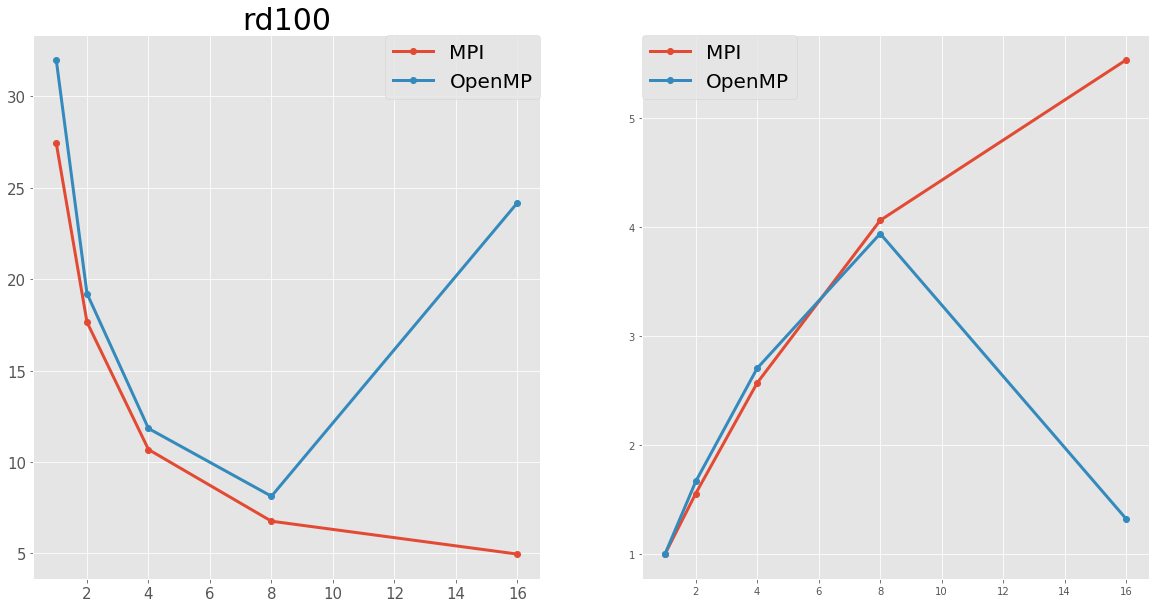

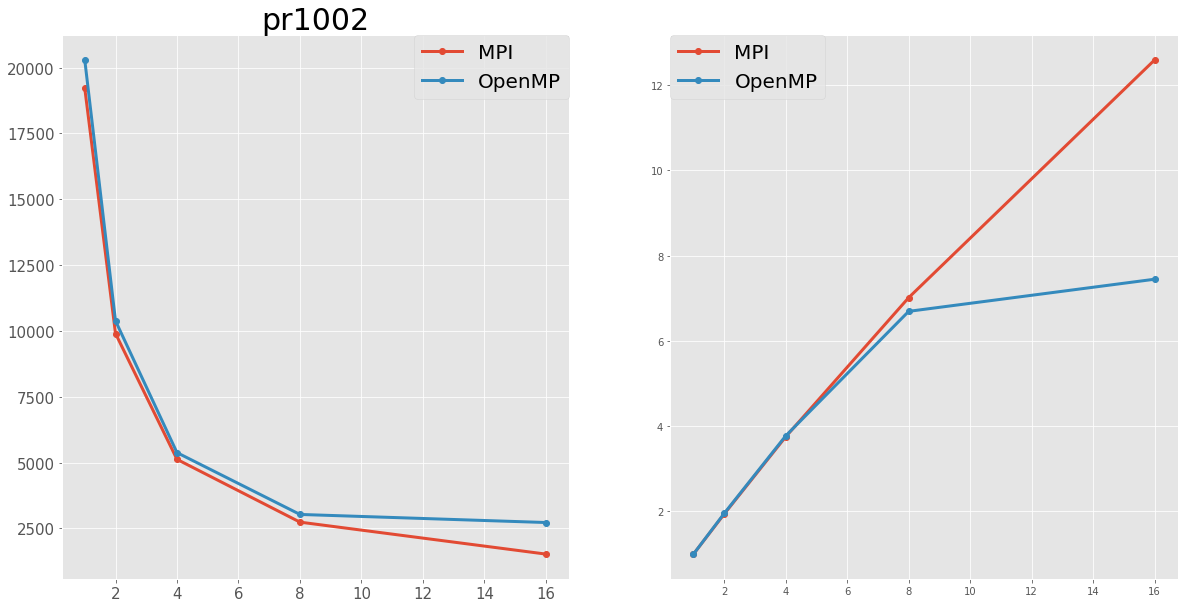

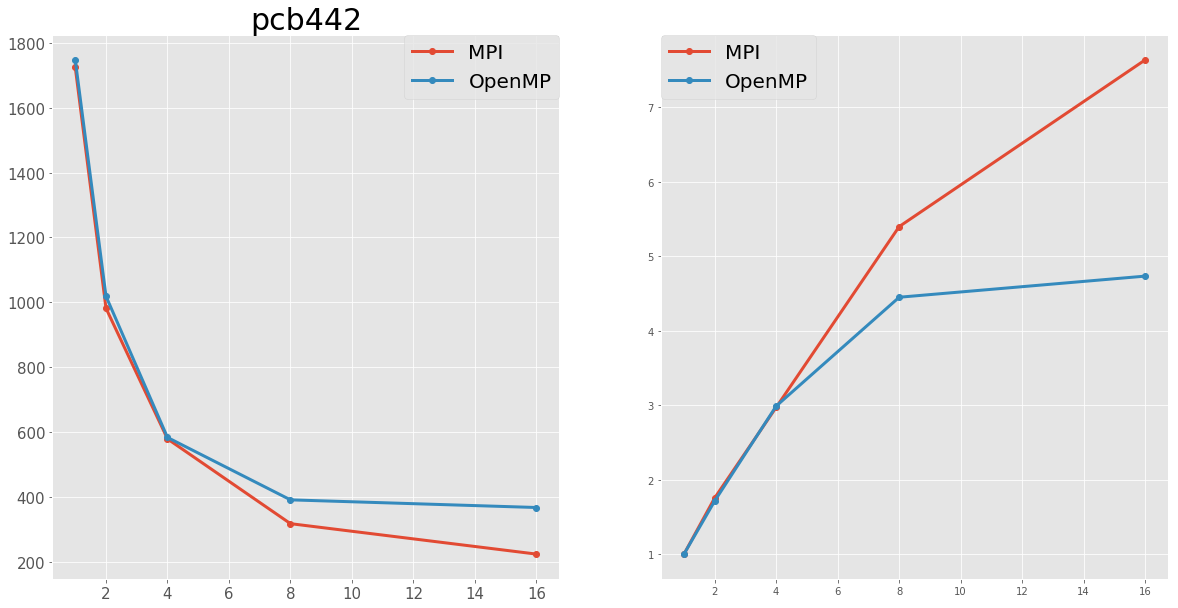

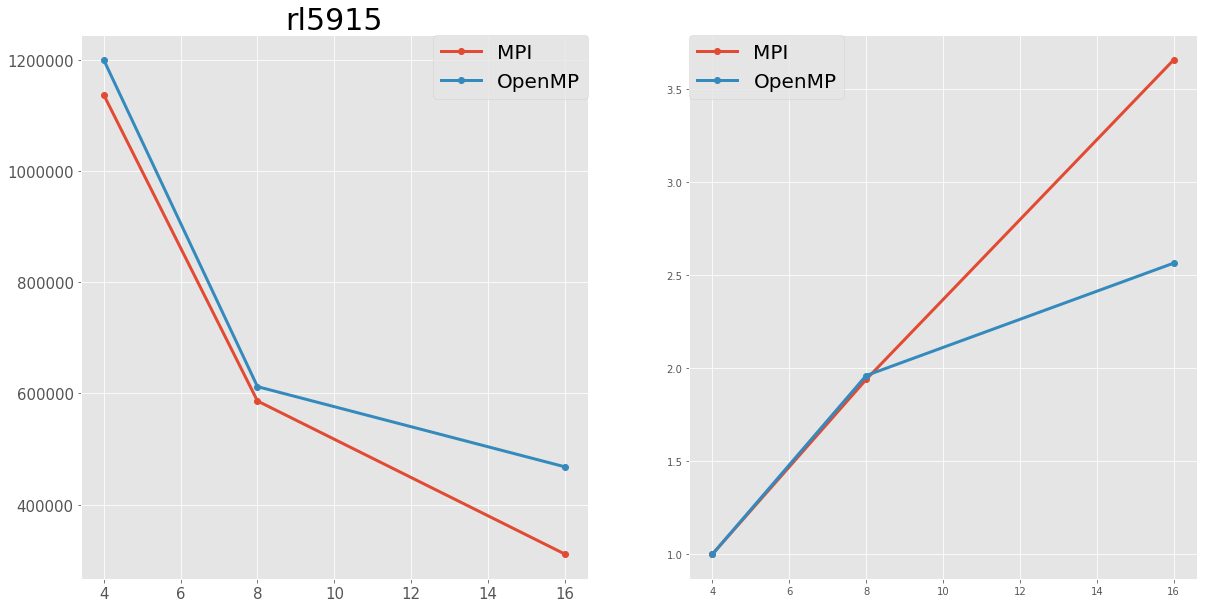

In [85]:
for i, caso in enumerate(casos):
    r = results[caso]
    fig, axis = plt.subplots(1,2, figsize=(20,10))
    set_ax_style(axis[0])
    
    procs = r[r.Tipo=="MPI"]["Processos/Threads"]
    tempoMPI = np.array(r[r.Tipo=="MPI"]["Tempo Total"])
    speedUpMPI = np.power(np.array(tempoMPI),-1)*tempoMPI[0]
    tempoOpenMP = np.array(r[r.Tipo=="OpenMP"]["Tempo Total"])
    speedUpOpenMP = np.power(np.array(tempoOpenMP),-1)*tempoOpenMP[0]
    
    
    axis[0].plot(procs, tempoMPI, marker="o",lw=3, label="MPI")
    axis[1].plot(procs, speedUpMPI, marker="o",lw=3, label="MPI")
    axis[0].plot(procs, tempoOpenMP, marker="o", lw=3, label="OpenMP")
    axis[1].plot(procs, speedUpOpenMP, marker="o", lw=3, label="OpenMP")
    axis[0].legend(borderaxespad=0., fontsize=20)
    axis[1].legend(borderaxespad=0., fontsize=20)
    axis[0].set_title(caso, fontsize=30)
    
    